<a href="https://colab.research.google.com/github/KEYamini/UNEMPLOYMENT-ANALYSIS-WITH-_oasis_task.2/blob/main/UNEMPLOYMENT_ANALYSIS_WITH_PYTHON_oasis_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the important libraries


In [60]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

Load the dataset into a pandas DataFrame


 Replace 'Unemployment in India.csv' with the path to your dataset


In [61]:
df = pd.read_csv('/content/Unemployment in India.csv')


Display basic information about the dataset

In [62]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None


Display the first few rows of the dataset



In [63]:
print(df.head())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


 Check for missing values


In [64]:
print(df.isnull().sum())


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


 Drop rows with missing values


In [65]:
df.dropna(inplace=True)


checking the null values

In [66]:
df.isnull().sum()


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [67]:
print(df.shape)

(740, 7)


In [68]:
print(len(['States','Date','Frequency','Estimated Unemployment Rate',
                'Estimated Employed','Estimated Labour Participation Rate',
                'Region','Longitude','Latitude']))

9


In [69]:
new_column_names = ['States','Date','Frequency','Estimated Unemployment Rate',
                'Estimated Employed','Estimated Labour Participation Rate',
                'Region','Longitude']
df.column = new_column_names

<ipython-input-69-4b09f833a3fa>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.column = new_column_names


In [70]:
df['New Column'] = None
df.column = ['States','Date','Frequency','Estimated Unemployment Rate',
                'Estimated Employed','Estimated Labour Participation Rate',
                'Region','Longitude','Latitude','New Column']

In [71]:
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,New Column
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,None
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,None
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,None
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,None
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,None


<ipython-input-72-971fa3c792e0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


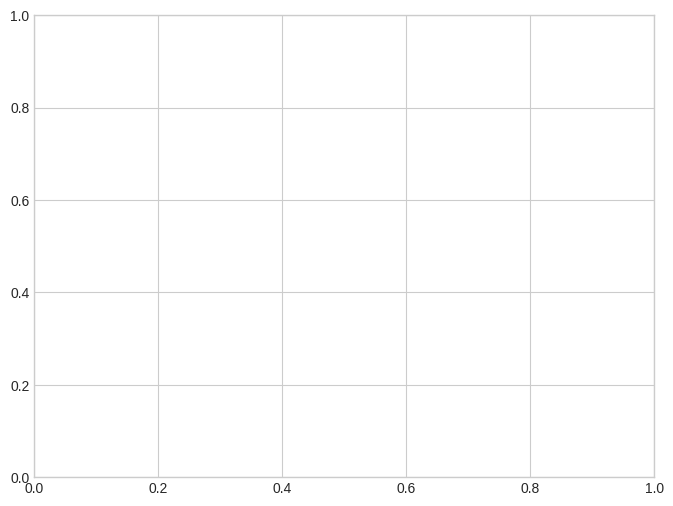

In [72]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,6))

ax = plt.gca()



<ipython-input-73-0c8fa769825e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True, linewidths=3)


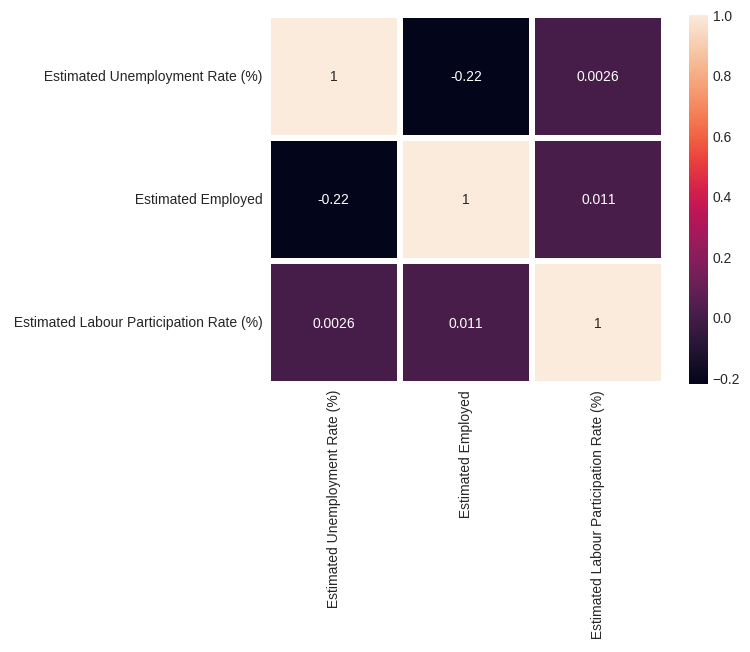

In [73]:
ax.tick_params(size=10,color='w',labelsize=10, labelcolor='w')

ax = sns.heatmap(df.corr(), annot=True, linewidths=3)

plt.show()

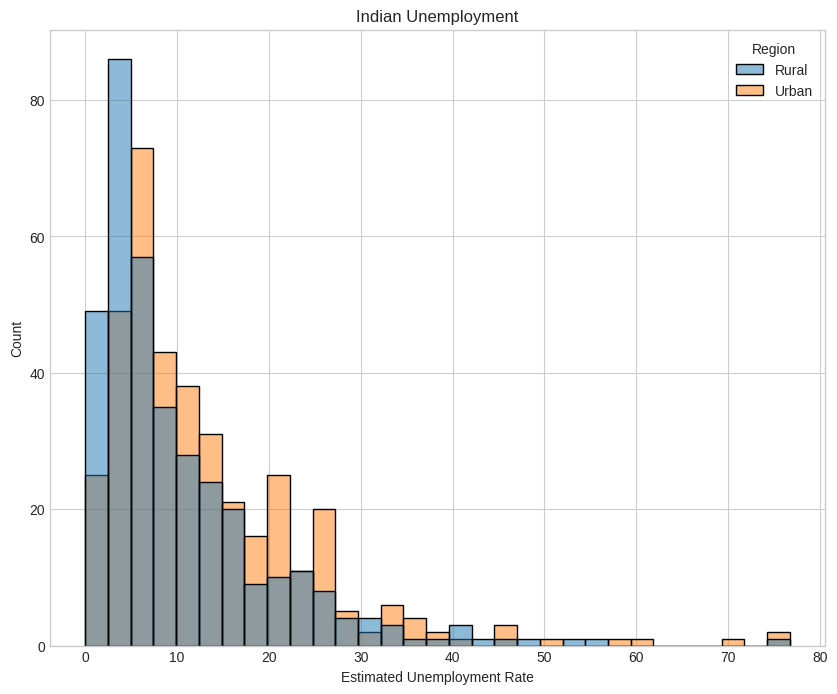

In [54]:
plt.figure(figsize=(10,8))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate",hue='Region',data=df)
plt.show()

In [84]:
print(df.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'New Column'],
      dtype='object')


In [86]:
unemployment = df[['Region', ' Estimated Unemployment Rate (%)']]
figure = px.sunburst(unemployment,
                     path=['Region'],
                     values=' Estimated Unemployment Rate (%)',
                     width=700, height=600, color_continuous_scale='RdYlGn',
                     title="Unemployment Rate in India")
figure.show()
